In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate

### **LINEAR TIME NORMALIZATION (LTN) FOR SPEECH SIGNAL ALIGNMENT**

In [ ]:
#Given Data
signal1_reference = np.array([0.2, 0.4, 0.6, 0.8, 1.0, 0.8, 0.6, 0.4, 0.2])
signal2_test = np.array([0.2, 0.3, 0.5, 0.7, 0.9, 1.0, 0.9, 0.7, 0.5, 0.4, 0.3, 0.2])


In [ ]:
print(f"\nSignal 1 (Reference) length: {len(signal1_reference)} samples")
print(f"Signal 2 (Test) length: {len(signal2_test)} samples")
print(f"Length difference: {len(signal2_test) - len(signal1_reference)} samples")


Signal 1 (Reference) length: 9 samples
Signal 2 (Test) length: 12 samples
Length difference: 3 samples


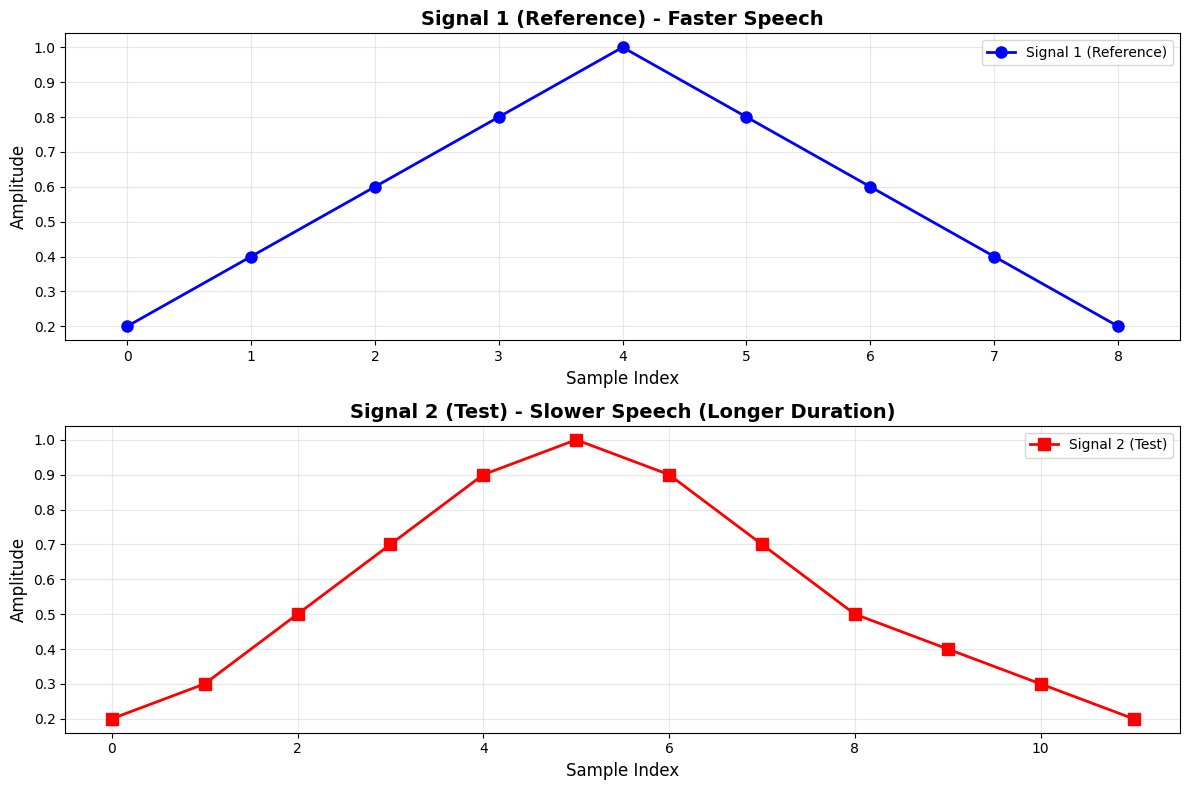

In [ ]:
# Task 1: Plot both speech signals to observe differences
fig, axes = plt.subplots(2, 1, figsize=(12, 8))

axes[0].plot(signal1_reference, 'b-o', linewidth=2, markersize=8, label='Signal 1 (Reference)')
axes[0].set_xlabel('Sample Index', fontsize=12)
axes[0].set_ylabel('Amplitude', fontsize=12)
axes[0].set_title('Signal 1 (Reference) - Faster Speech', fontsize=14, fontweight='bold')
axes[0].grid(True, alpha=0.3)
axes[0].legend(fontsize=10)
axes[0].set_xlim(-0.5, len(signal1_reference)-0.5)

axes[1].plot(signal2_test, 'r-s', linewidth=2, markersize=8, label='Signal 2 (Test)')
axes[1].set_xlabel('Sample Index', fontsize=12)
axes[1].set_ylabel('Amplitude', fontsize=12)
axes[1].set_title('Signal 2 (Test) - Slower Speech (Longer Duration)', fontsize=14, fontweight='bold')
axes[1].grid(True, alpha=0.3)
axes[1].legend(fontsize=10)
axes[1].set_xlim(-0.5, len(signal2_test)-0.5)

plt.tight_layout()
plt.savefig('task1_original_signals.png', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
#Perform Linear Time Normalization on Signal 2
# Create time indices for both signals
time_signal2 = np.linspace(0, 1, len(signal2_test))
time_signal1 = np.linspace(0, 1, len(signal1_reference))

In [ ]:
# Interpolate Signal 2 to match the length of Signal 1
interpolator = interpolate.interp1d(time_signal2, signal2_test, kind='linear')
signal2_normalized = interpolator(time_signal1)

In [ ]:
print(f"\nOriginal Signal 2 length: {len(signal2_test)} samples")
print(f"Normalized Signal 2 length: {len(signal2_normalized)} samples")
print(f"Target length (Signal 1): {len(signal1_reference)} samples")


Original Signal 2 length: 12 samples
Normalized Signal 2 length: 9 samples
Target length (Signal 1): 9 samples


In [ ]:
# Calculate point-to-point differences
alignment_error = signal1_reference - signal2_normalized
mse = np.mean(alignment_error**2)
mae = np.mean(np.abs(alignment_error))

In [ ]:
print(f"  Mean Squared Error (MSE): {mse:.6f}")
print(f"  Mean Absolute Error (MAE): {mae:.6f}")
print(f"  Correlation coefficient: {np.corrcoef(signal1_reference, signal2_normalized)[0,1]:.6f}")

  Mean Squared Error (MSE): 0.004826
  Mean Absolute Error (MAE): 0.055556
  Correlation coefficient: 0.969049


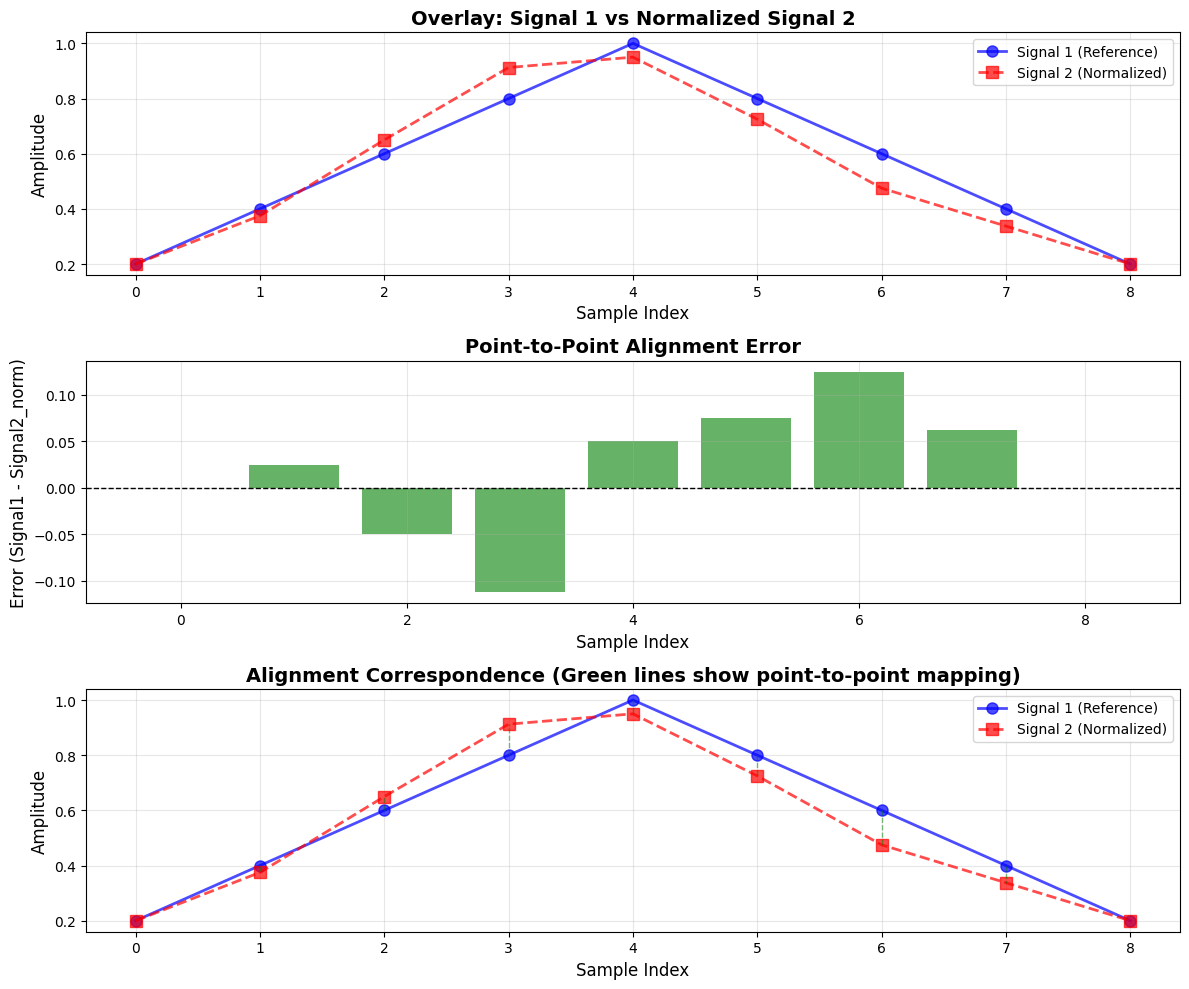

In [ ]:
# Plot comparison of normalized signals
fig, axes = plt.subplots(3, 1, figsize=(12, 10))

# Plot 1: Overlay of Signal 1 and Normalized Signal 2
axes[0].plot(signal1_reference, 'b-o', linewidth=2, markersize=8, label='Signal 1 (Reference)', alpha=0.7)
axes[0].plot(signal2_normalized, 'r--s', linewidth=2, markersize=8, label='Signal 2 (Normalized)', alpha=0.7)
axes[0].set_xlabel('Sample Index', fontsize=12)
axes[0].set_ylabel('Amplitude', fontsize=12)
axes[0].set_title('Overlay: Signal 1 vs Normalized Signal 2', fontsize=14, fontweight='bold')
axes[0].grid(True, alpha=0.3)
axes[0].legend(fontsize=10)

# Plot 2: Point-to-point alignment error
axes[1].bar(range(len(alignment_error)), alignment_error, color='green', alpha=0.6)
axes[1].axhline(y=0, color='black', linestyle='--', linewidth=1)
axes[1].set_xlabel('Sample Index', fontsize=12)
axes[1].set_ylabel('Error (Signal1 - Signal2_norm)', fontsize=12)
axes[1].set_title('Point-to-Point Alignment Error', fontsize=14, fontweight='bold')
axes[1].grid(True, alpha=0.3)

# Plot 3: Both signals with error bars
axes[2].plot(signal1_reference, 'b-o', linewidth=2, markersize=8, label='Signal 1 (Reference)', alpha=0.7)
axes[2].plot(signal2_normalized, 'r--s', linewidth=2, markersize=8, label='Signal 2 (Normalized)', alpha=0.7)
for i in range(len(signal1_reference)):
    axes[2].plot([i, i], [signal1_reference[i], signal2_normalized[i]], 'g--', alpha=0.5, linewidth=1)
axes[2].set_xlabel('Sample Index', fontsize=12)
axes[2].set_ylabel('Amplitude', fontsize=12)
axes[2].set_title('Alignment Correspondence (Green lines show point-to-point mapping)', fontsize=14, fontweight='bold')
axes[2].grid(True, alpha=0.3)
axes[2].legend(fontsize=10)

plt.tight_layout()
plt.savefig('task2_3_normalized_alignment.png', dpi=300, bbox_inches='tight')
plt.show()


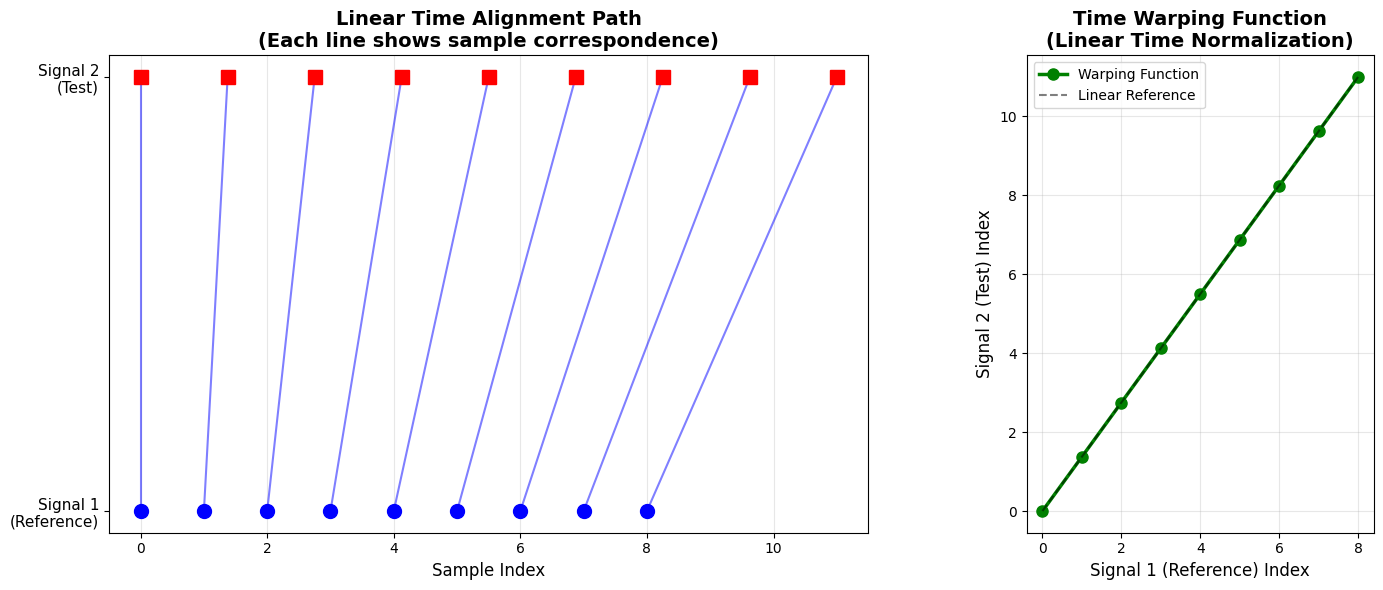

In [ ]:
# Create alignment path showing correspondence
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Left plot: Alignment path in 2D space
for i in range(len(signal1_reference)):
    # Map each point in Signal 1 to its corresponding original position in Signal 2
    original_position = i * (len(signal2_test) - 1) / (len(signal1_reference) - 1)
    axes[0].plot([i, original_position], [0, 1], 'b-', alpha=0.5, linewidth=1.5)
    axes[0].plot(i, 0, 'bo', markersize=10)
    axes[0].plot(original_position, 1, 'rs', markersize=10)

axes[0].set_xlabel('Sample Index', fontsize=12)
axes[0].set_yticks([0, 1])
axes[0].set_yticklabels(['Signal 1\n(Reference)', 'Signal 2\n(Test)'], fontsize=11)
axes[0].set_title('Linear Time Alignment Path\n(Each line shows sample correspondence)',
                  fontsize=14, fontweight='bold')
axes[0].grid(True, alpha=0.3, axis='x')
axes[0].set_xlim(-0.5, max(len(signal1_reference), len(signal2_test))-0.5)

# Right plot: Warping function
signal1_indices = np.arange(len(signal1_reference))
signal2_indices = signal1_indices * (len(signal2_test) - 1) / (len(signal1_reference) - 1)

axes[1].plot(signal1_indices, signal2_indices, 'g-o', linewidth=2.5, markersize=8, label='Warping Function')
axes[1].plot([0, len(signal1_reference)-1], [0, len(signal2_test)-1], 'k--',
             linewidth=1.5, alpha=0.5, label='Linear Reference')
axes[1].set_xlabel('Signal 1 (Reference) Index', fontsize=12)
axes[1].set_ylabel('Signal 2 (Test) Index', fontsize=12)
axes[1].set_title('Time Warping Function\n(Linear Time Normalization)', fontsize=14, fontweight='bold')
axes[1].grid(True, alpha=0.3)
axes[1].legend(fontsize=10)
axes[1].set_aspect('equal', adjustable='box')

plt.tight_layout()
plt.savefig('task4_alignment_path.png', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
print(f"\n{'Signal 1':<12} {'Signal 2':<15} {'Signal 1':<12} {'Normalized':<15} {'Alignment':<12}")
print(f"{'Index':<12} {'Index (Mapped)':<15} {'Value':<12} {'Signal 2':<15} {'Error':<12}")
for i in range(len(signal1_reference)):
  mapped_index = i * (len(signal2_test) - 1) / (len(signal1_reference) - 1)
  print(f"{i:<12} {mapped_index:<15.2f} {signal1_reference[i]:<12.3f} "
          f"{signal2_normalized[i]:<15.3f} {alignment_error[i]:<12.6f}")


Signal 1     Signal 2        Signal 1     Normalized      Alignment   
Index        Index (Mapped)  Value        Signal 2        Error       
0            0.00            0.200        0.200           0.000000    
1            1.38            0.400        0.375           0.025000    
2            2.75            0.600        0.650           -0.050000   
3            4.12            0.800        0.912           -0.112500   
4            5.50            1.000        0.950           0.050000    
5            6.88            0.800        0.725           0.075000    
6            8.25            0.600        0.475           0.125000    
7            9.62            0.400        0.338           0.062500    
8            11.00           0.200        0.200           0.000000    
